<a href="https://colab.research.google.com/github/SDPreetham/Unsupervised_Learning-_Profile_Segmentation/blob/main/Profile_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unsupervised Segmentation: Clustering Scaler Learners by Job and Company Features**

- **By S D Preetham**

**Problem Description:**

* Scaler, an online upskilling platform, aims to identify top companies and job positions for its learners by analyzing their professional profiles. As a part of this objective, clustering of learners is done,based on features like job role, company, compensation (CTC) and experience, uncovering patterns among similar learner segments.

* This analysis helps Scaler profile high-performing roles and companies, provide targeted career recommendations and tailor its programs to better align with industry trends and learner aspirations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('scaler.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


### **Exploratory Data Analyis:**

In [ ]:
print('The number of rows(learners) are: ', df.shape[0])
print('The number of columns are: ', df.shape[1])

The number of rows(learners) are:  205843
The number of columns are:  6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
len(df[df.duplicated()])

34

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print('The number of rows(learners) are: ', df.shape[0])
print('The number of columns are: ', df.shape[1])

The number of rows(learners) are:  205809
The number of columns are:  6


In [ ]:
 df.isnull().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52548
ctc_updated_year,0


In [ ]:
df.nunique()

,0
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


**Insights:**

* The dataset originally consists of 2,05,843 rows and 6 columns, out of which 34 have been found to be duplicated. After the removal of duplicate rows, the dataset has a size of 2,05,809 rows and 6 columns.

* Although the dataset consists of 2,05,843 rows, there are only 1,53,443 unique learners. This may be due to the switch made by learners to a different roles/companies during their learning at Scaler, thus making these changes reflect using multiple rows.

* The dataset also consists of 52548 null values in job position column, 86 null values in org year column and 44 missing company hashes. This signals a requirement for imputation.

### **Data Preprocessing:**

In [ ]:
import re
df['job_position'] = df['job_position'].astype(str).apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x).strip())

**Explanation:**

* This code removes any characters from the job_position column that are not letters, numbers or spaces and then removes any extra spaces at the beginning or end of the cleaned string. This helps standardize the job position entries for further analysis.

**Handling null values:**


In [ ]:
from sklearn.impute import KNNImputer

# Replacing the missing company values with the mode
df['company_hash'] = df['company_hash'].fillna(df['company_hash'].mode()[0])

# Imputation of missing org_year values using K-NN Imputer
imputer = KNNImputer(n_neighbors = 5)
df[['orgyear']] = imputer.fit_transform(df[['orgyear']])
df['orgyear'] = df['orgyear'].round().astype(int)

In [ ]:
import numpy as np

df['job_position'] = df['job_position'].replace('nan', np.nan)

In [ ]:
# Imputing missing job positions by group-wise mode (company_hash)
df['job_position'] = df.groupby('company_hash')['job_position'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

# Imputing remaining missing values (those in all-NaN groups) with overall mode
df['job_position'] = df['job_position'].fillna(df['job_position'].mode()[0])

In [ ]:
df.isnull().sum()

,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


**Computing years of experience:**

In [ ]:
from datetime import datetime
current = datetime.now().year
df['years_experience'] = current - df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,9
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019.0,7
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,10
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,8
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019.0,8


### **Univariate Analysis:**

**Distribution plots for continuous variables:**

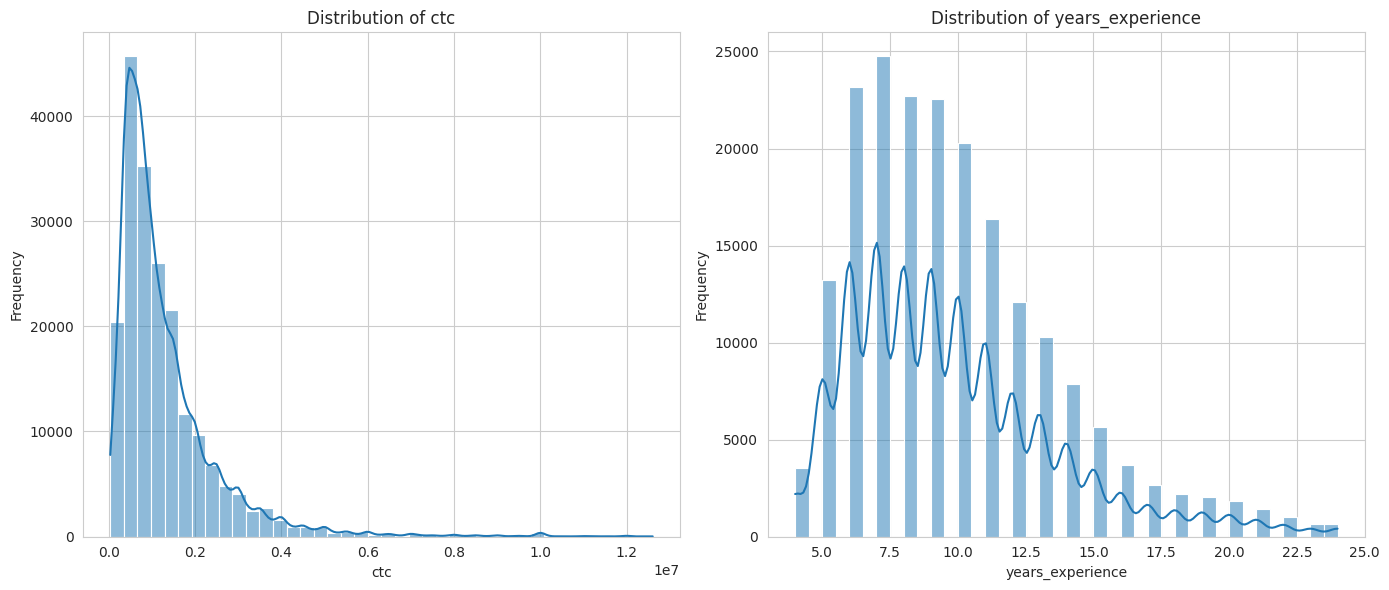

In [ ]:
df_filtered = df[
    (df['ctc'].between(df['ctc'].quantile(0.01), df['ctc'].quantile(0.99))) &
    (df['years_experience'].between(df['years_experience'].quantile(0.01), df['years_experience'].quantile(0.99)))
]

continuous = ['ctc', 'years_experience']

plt.figure(figsize=(14, 6))

for i, col in enumerate(continuous):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df_filtered[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights:**

* CTC Distribution:
 * This is a highly right skewed distribution.
 * A majority of learners at Scaler earn between Rs 10-14 lakhs per annum.
* Experience in years Distribution:
 * A large number of learners at Scaler have an experience of 6-8 years. This suggests that the dataset predominantly consists of professionals in the mid-career phase.

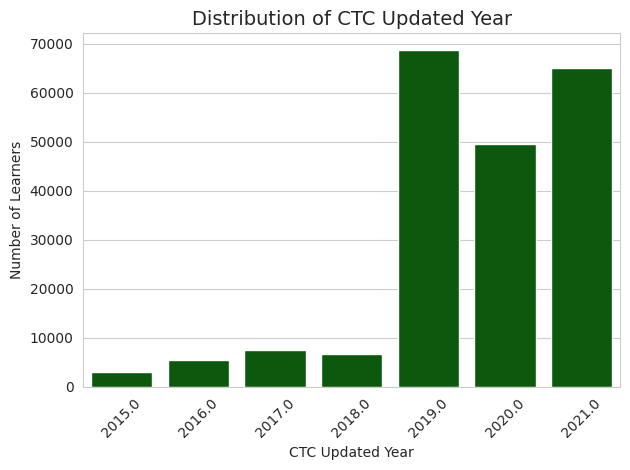

In [ ]:
# Countplot for ctc_updated_year
sns.countplot(data=df, x='ctc_updated_year', color='darkgreen')
plt.title('Distribution of CTC Updated Year', fontsize=14)
plt.xlabel('CTC Updated Year')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


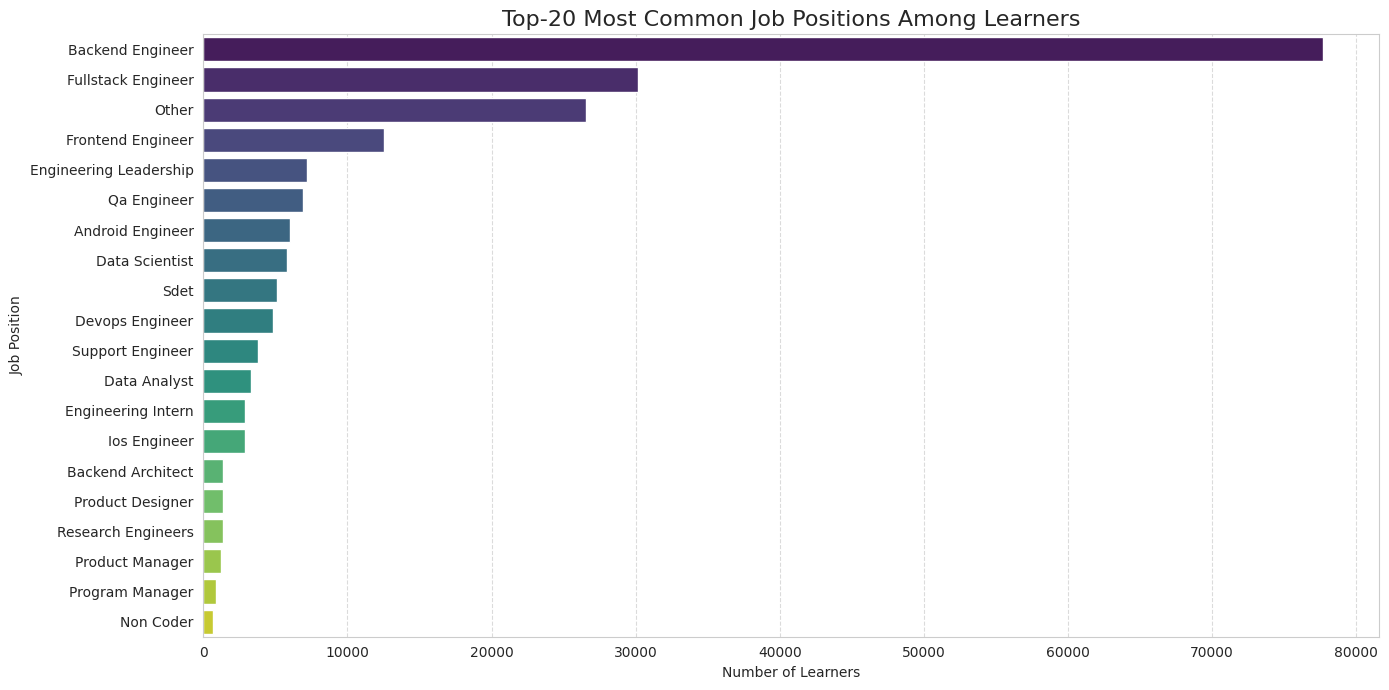

In [ ]:

df['job_position'] = df['job_position'].str.strip().str.title()

filtered_df = df[df['job_position'].str.lower() != 'unknown']

top_jobs = filtered_df['job_position'].value_counts().head(20)

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top-20 Most Common Job Positions Among Learners', fontsize=16)
plt.xlabel('Number of Learners')
plt.ylabel('Job Position')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage distribution of job positions
job_percent = (filtered_df['job_position'].value_counts(normalize=True) * 100).round(2)
job_percent_df = job_percent.reset_index()
job_percent_df.columns = ['Job Position', 'Percentage']

print(job_percent_df.head(20))

              Job Position  Percentage
0         Backend Engineer       37.76
1       Fullstack Engineer       14.66
2                    Other       12.90
3        Frontend Engineer        6.08
4   Engineering Leadership        3.51
5              Qa Engineer        3.37
6         Android Engineer        2.91
7           Data Scientist        2.82
8                     Sdet        2.48
9          Devops Engineer        2.33
10        Support Engineer        1.86
11            Data Analyst        1.61
12      Engineering Intern        1.40
13            Ios Engineer        1.39
14       Backend Architect        0.67
15        Product Designer        0.66
16      Research Engineers        0.66
17         Product Manager        0.60
18         Program Manager        0.41
19               Non Coder        0.31


**Insights:**
* It is observed that over 50% of learners at Scaler are into the field of Web Development, with Backend Engineers and FullStack Engineers contributing to ~38% and ~15% respectively.
* The learners work in diverse areas such as Data Science, Devops and Product Management etc.


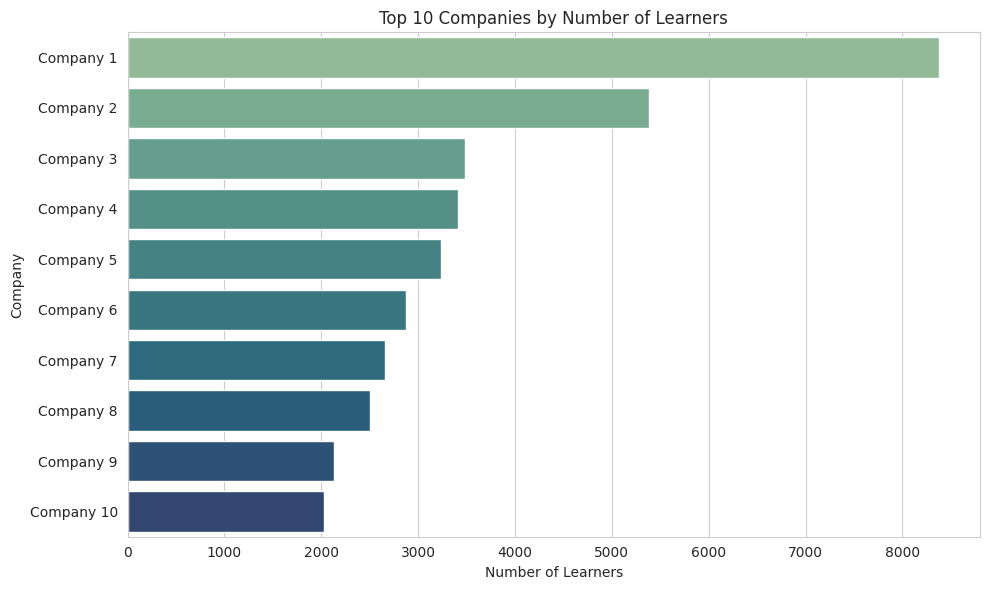

In [ ]:
# Get top 10 most frequent companies
top_companies = df['company_hash'].value_counts().nlargest(10).index
company_mapping = {hash_val: f'Company {i+1}' for i, hash_val in enumerate(top_companies)}
df['company_label'] = df['company_hash'].map(company_mapping)
filtered_df = df[df['company_label'].notnull()]
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.countplot(data=filtered_df, y='company_label', order=filtered_df['company_label'].value_counts().index, palette='crest')

plt.title('Top 10 Companies by Number of Learners')
plt.xlabel('Number of Learners')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

**Insight:**

* It is observed that over 8000 learners at Scaler work for a same company.
* Similarly, there are few such other companies where the Scaler Learners work.

### **Bivariate Analysis:**

**Average CTC by Job Position:**

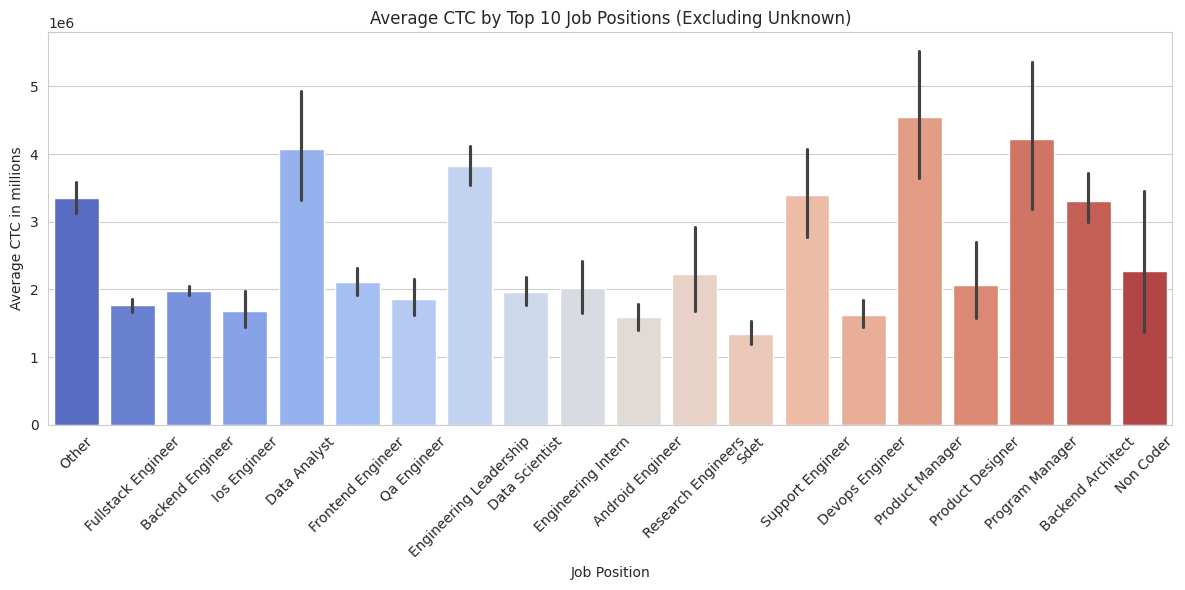

In [ ]:
plt.figure(figsize=(12, 6))
top_jobs = df[df['job_position'] != 'Unknown']['job_position'].value_counts().nlargest(20).index

sns.barplot(data=df[df['job_position'].isin(top_jobs)],
            x='job_position', y='ctc',
            estimator=np.mean, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average CTC by Top 10 Job Positions (Excluding Unknown)')
plt.ylabel('Average CTC in millions')
plt.xlabel('Job Position')
plt.tight_layout()


**Insights:**
* It is observed that the average CTC of most of the learners ranges between Rs 1.5-2 million per annum.
* Average CTC of learners who work in the field of Product Management and Data Analysis is observed to be over 4 million rupees per annum.
* Some of the other high paying fields include Engineering Leadership and Program Management, with an average CTC of nearly 3.8 million rupees per annum.

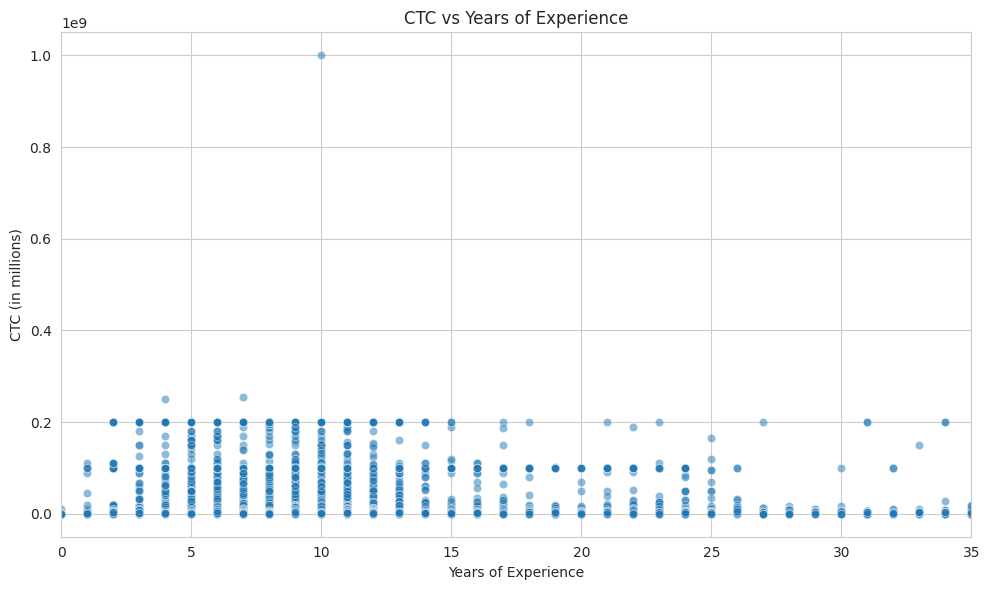

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_experience', y='ctc', alpha=0.5)
plt.xlim(0,35)
plt.title('CTC vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('CTC (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**

* It is observed that there is a proportional relationship between CTC and Years of Experience between 0-5 Years. However, the CTC remains unaffected after this stage.

### **Feature Engineering:**

In [ ]:
df['company_hash'] = df['company_hash'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))

**Standardization and Encoding:**

In [ ]:
df.drop(columns = ['company_label'], inplace = True)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,9
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,Fullstack Engineer,2019.0,7
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,10
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,8
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,Fullstack Engineer,2019.0,8


In [ ]:
# Scaling the numerical columns in the dataset using Standard Scaler technique

from sklearn.preprocessing import StandardScaler

clustering_df = df[['ctc', 'years_experience']].copy()

scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_df)
clustering_df_scaled = pd.DataFrame(clustering_scaled, columns=['ctc_scaled', 'years_experience_scaled'])
clustering_df_scaled.head()

,ctc_scaled,years_experience_scaled
0,-0.099295,-0.017584
1,-0.154371,-0.049049
2,-0.023036,-0.001852
3,-0.133188,-0.033316
4,-0.073875,-0.033316


In [ ]:
# Encoding the required categorical features using Label Encoding technique

from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()

df['company_encoded'] = le_company.fit_transform(df['company_hash'])
df['job_encoded'] = le_job.fit_transform(df['job_position'])

### **Manual Clustering:**

In [ ]:
# Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position and Years of Experience

summary = df.groupby(['company_hash', 'job_position', 'years_experience'])['ctc'].agg(['mean','median','max','min','count']).reset_index()
summary.columns = ['company_hash','job_position','years_experience','avg_ctc','med_ctc','max_ctc','min_ctc','count']

df = df.merge(summary, on = ['company_hash', 'job_position', 'years_experience'], how  = 'left')
df['designation'] = df.apply(
    lambda x: 1 if x['ctc'] > x['avg_ctc'] else (3 if x['ctc'] < x['avg_ctc'] else 2),
    axis=1
)


**Explanation:**
* This code block calculates the 5-point summary (mean, median, max, min and count) of the 'ctc' for each unique combination of 'company_hash', 'job_position' and 'years_experience'. It then merges this summary back into the main DataFrame df and creates a new column 'designation' that categorizes each individual's CTC relative to the average CTC for their specific group.
* This helps to understand how an individual's salary when compared to others in the same company, job and experience level.

In [ ]:
# Average CTC for each unique combination of company and job position
class_group = df.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
class_group.columns = ['company_hash', 'job_position', 'avg_class_ctc']

df = df.merge(class_group, on = ['company_hash', 'job_position'])
df['Class'] = df.apply(lambda x:1 if x.ctc > x.avg_class_ctc else (3 if x.ctc< x.avg_class_ctc else 2), axis = 1)

**Explanation:**

* This code block calculates the average CTC for each unique combination of company and job position. It then merges this average back into the main DataFrame and creates a new column called 'Class'. The 'Class' column categorizes each individual's CTC based on whether it's above, below or equal to the average CTC for their specific company and job position. This helps to understand how an individual's salary compares to others in the same company and job role.

In [ ]:
# Average CTC for each unique company
tier_group = df.groupby(['company_hash'])['ctc'].mean().reset_index()
tier_group.columns = ['company_hash', 'avg_tier_ctc']
df = df.merge(tier_group, on ='company_hash')
df['Tier'] = df.apply(lambda x: 1 if x.ctc> x.avg_tier_ctc else ( 3 if x.ctc < x.avg_tier_ctc else 2), axis = 1)

**Explanation:**
* This code block calculates the average CTC for each unique company and then merges this average back into the main DataFrame. It then creates a new column called 'Tier' that categorizes each individual's CTC based on whether it's above, below or equal to the average CTC for their specific company.

### **Deriving Insights from Manual Clustering:**

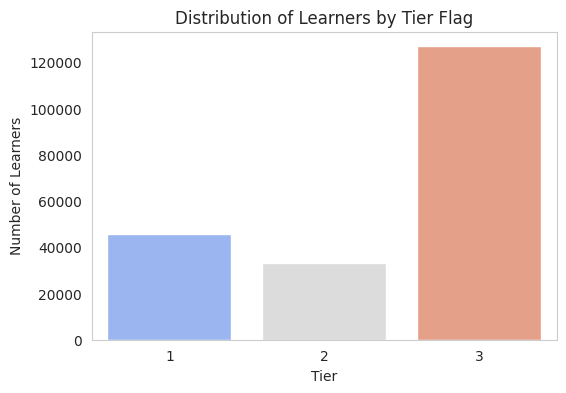

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Tier', palette='coolwarm')
plt.title('Distribution of Learners by Tier Flag')
plt.xlabel('Tier')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
plt.show()

In [ ]:
# Top-10 Employees (Highest CTC)
top10_tier1 = df[df['Tier'] == 1].sort_values(by='ctc', ascending=False).head(10)
top10_tier1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_experience,company_encoded,job_encoded,avg_ctc,med_ctc,max_ctc,min_ctc,count,designation,avg_class_ctc,Class,avg_tier_ctc,Tier
117626,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018,255555555,Fullstack Engineer,2016.0,7,14528,273,6.531389e+07,2300000.0,255555555,1100000,4,1,5.259311e+07,1,4.395259e+07,1
22185,nvnv wgzohrnvzwj otqcxwto,97d25613e7bc3f47c87492d311f77232c105e4bc9ce642...,2018,200000000,Support Engineer,2020.0,7,13560,810,4.893948e+06,430000.0,200000000,3300,91,1,2.677364e+06,1,1.663198e+06,1
44222,vnbtwo ntwyzgrgsxto ucn rna,5debc0e86d35b6d0394f79154180eb3bf2a6131a114cb5...,2014,200000000,Support Engineer,2020.0,11,27284,810,2.000000e+08,200000000.0,200000000,200000000,1,2,1.001750e+08,1,7.261613e+06,1
112603,rxzhdfgqra xzegqbvnxwo,be8afd4a4e5cedb6bfbabbc88f15e756d69c3f2491d02a...,2021,200000000,Data Scientist,2019.0,4,21248,189,2.000000e+08,200000000.0,200000000,200000000,1,2,1.004000e+08,1,1.004000e+08,1
27075,qhuttp,0f0e7a9db34d1317498d9378a1bd0150bfa022ac6ba3a0...,2013,200000000,Engineering Leadership,2020.0,12,19322,231,2.000000e+08,200000000.0,200000000,200000000,1,2,2.000000e+08,2,2.958571e+07,1
114934,gjg,d361e94a21d4b5eddb955a2494dc451d4c8387fcfd0fb1...,2019,200000000,Backend Engineer,2019.0,6,7491,120,3.965096e+06,1050000.0,200000000,400000,73,1,2.281187e+06,1,2.229684e+06,1
12281,wgszxkvzn,00eebd69d81c0bb5d4ad91392d7b994395333d98cae7f0...,2013,200000000,Backend Engineer,2020.0,12,30207,120,1.014112e+07,850000.0,200000000,8800,32,1,2.386880e+06,1,1.739554e+06,1
12243,ntrtutqegqbvzwt,979d02840c45c1d5790306130a0977aab05f2bd2679687...,2013,200000000,Data Analyst,2020.0,12,13018,180,2.000000e+08,200000000.0,200000000,200000000,1,2,2.051400e+07,1,8.037720e+06,1
120071,xb v onhatzn,431c610cffb5f699476173431bb1f47a51bcc680407e44...,2020,200000000,Other,2019.0,5,32508,434,4.293835e+06,900000.0,200000000,1000,115,1,3.052363e+06,1,4.465777e+06,1
31297,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015,200000000,Data Scientist,2019.0,10,8959,189,2.000000e+08,200000000.0,200000000,200000000,1,2,6.743667e+07,1,2.932143e+07,1


In [ ]:
# Top-10 Data Science Employees in Each Company

top10_class1_ds = df[(df['job_position'].str.contains('data science', case=False)) & (df['Class'] == 1)]
top10_class1_ds = top10_class1_ds.groupby('company_hash').apply(lambda x: x.sort_values('ctc', ascending=False).head(10)).reset_index(drop=True)

top10_companies = df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)

In [ ]:
# Bottom-10 Data Science Employees in Each Company
bottom10_class3_ds = df[(df['job_position'].str.contains('data science', case=False)) & (df['Class'] == 3)]
bottom10_class3_ds = bottom10_class3_ds.groupby('company_hash').apply(lambda x: x.sort_values('ctc').head(10)).reset_index(drop=True)

In [ ]:
# Bottom-10 Employees by CTC (Overall)
bottom10_tier3 = df[df['Tier'] == 3].sort_values(by='ctc').head(10)

In [ ]:
# Top 10 employees in each company in Data Science department having 5-7 years of experience earning more than their peers
df_filter = df[(df['years_experience'] == 5) &
               (df['job_position'].str.contains('data science', case=False)) &
               (df['Tier'] == 1)]

top10_exp5_ds = df_filter.groupby('company_hash').apply(lambda x: x.sort_values('ctc', ascending=False).head(10)).reset_index(drop=True)


In [ ]:
# Top 10 Companies by Average CTC
top10_companies = df.groupby('company_hash')['ctc'].mean().sort_values(ascending=False).head(10)
top10_companies

,ctc
company_hash,
whmxw rgsxwo uqxcvnt rxbxnta,1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj,2.500000e+08
evwxrt otqcxwto,2.000000e+08
ogzv wgrrtst ge ntwyzgrgsjvzzv hzxctqoxnj,2.000000e+08
yxzahlv sgmvr ogrhnxgzo,2.000000e+08
ehlxonh,2.000000e+08
xwhmt ogrhnxgzo,2.000000e+08
xtrrxuot ntwyzgrgsxto,2.000000e+08
vwwg,2.000000e+08


In [ ]:
# Top 2 Job Positions per Company (based on CTC)
top_positions = df.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
top_positions = top_positions.sort_values(['company_hash', 'ctc'], ascending=[True, False])
top_positions = top_positions.groupby('company_hash').head(2)

### **Unsupervised learning - K-Means Clustering:**

In [ ]:
encoded_features = df[['job_encoded', 'company_encoded']]
encoded_scaled = StandardScaler().fit_transform(encoded_features)

clustering_features = pd.concat([clustering_df_scaled, df[['job_encoded', 'company_encoded']]], axis = 1)

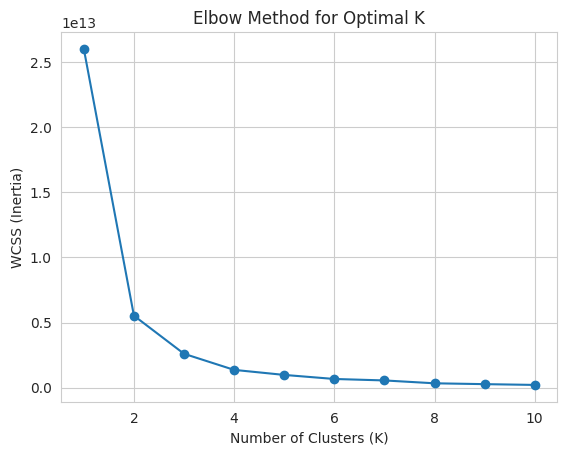

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(clustering_features)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

**Explanation:**

* The Elbow method is used to determine the optimal number of clusters for K-Means clustering.
* This is done by by calculating the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers (1 to 10).

* The Elbow point (K=3) in the plot identifies the optimal number of clusters, which is where the decrease in WCSS starts to level off, suggesting that adding more clusters beyond this point does not significantly improve the clustering.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(clustering_features)

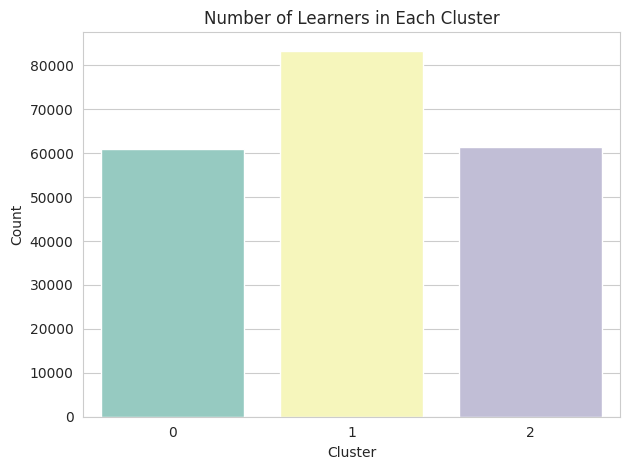

In [ ]:
sns.countplot(data=df, x='kmeans_cluster', palette='Set3')
plt.title('Number of Learners in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights:**
* It is observed that among the 3 clusters, cluster-1 consists of the highest number of alike learners (~81000).

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(clustering_features, df['kmeans_cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.6139


Insights:
* A Silhouette Score of 0.6139 indicates well-defined clusters, separating learners into distinct groups, but some overlap may still exist between clusters.

* The separability can be further enhanced using Principal Component Analysis. This technique reduces the dimensionality and removes noise or redundant features, making the data more compact and structured.

**Improving Clustering by using PCA:**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
clustering_pca = pca.fit_transform(clustering_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(clustering_pca)
score = silhouette_score(clustering_pca, labels)

print(f'Improved Silhouette Score (PCA): {score:.4f}')

Improved Silhouette Score (PCA): 0.9832


In [ ]:
print("Explained Variance Ratio by PCA:", pca.explained_variance_ratio_)

Explained Variance Ratio by PCA: [0.50071444 0.49928556]


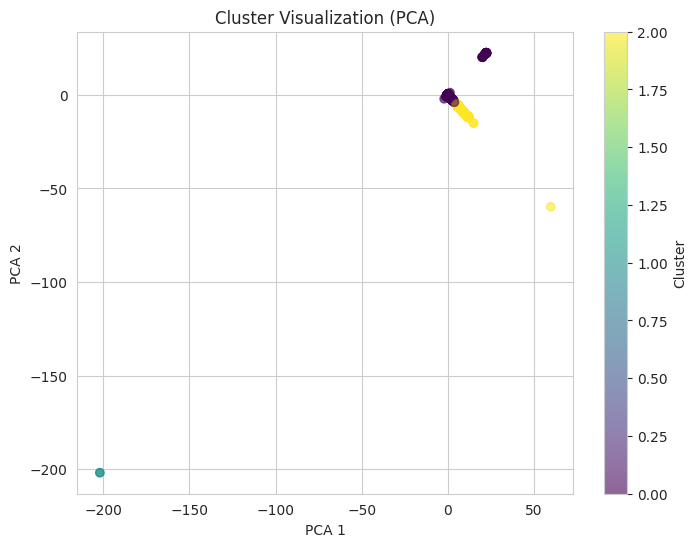

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(clustering_pca[:, 0], clustering_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
1,83376
2,61436
0,60997


**Insights:**
* The improved Silhouette Score of 0.9832 indicates exceptionally well-defined and well-separated clusters, suggesting that PCA has significantly enhanced clustering quality.

* The first two principal components explain 50.1% and 49.9% of the variance respectively, showing that PCA has efficiently compressed the dataset with minimal information loss.

* The clusters are fairly balanced in size—Cluster 1 (83,315), Cluster 0 (61,373), Cluster 2 (61,121) indicating that the segmentation is equitable across learners.

In [ ]:
cluster_summary = df.groupby('kmeans_cluster').agg({
    'ctc': ['mean', 'median', 'max', 'min'],
    'years_experience': ['mean', 'median'],
    'company_hash': pd.Series.mode
})
cluster_summary

ctc                             years_experience  \
                        mean     median         max  min             mean   
kmeans_cluster                                                              
0               2.289206e+06  1090000.0   250000000   25        10.274013   
1               2.220744e+06   880000.0  1000150000    2         9.960816   
2               2.324016e+06   900000.0   255555555  600        10.175369   

                                    company_hash  
               median                       mode  
kmeans_cluster                                    
0                 9.0              fxuqg rxbxnta  
1                 9.0                    xzegojo  
2                 9.0  nvnv wgzohrnvzwj otqcxwto

**Insights:**

*  All three clusters have a similar average CTC (2.2-2.3 million INR).
* Each cluster is dominated by a different company_hash, suggesting that companies tend to have distinct salary and experience groupings, supporting the relevance of cluster differentiation.

In [ ]:
for cluster in sorted(df['kmeans_cluster'].unique()):
    print(f"\nTop job positions in Cluster {cluster}:")
    print(df[df['kmeans_cluster'] == cluster]['job_position'].value_counts().head(5))


Top job positions in Cluster 0:
job_position
Backend Engineer          23022
Fullstack Engineer         9467
Other                      7557
Frontend Engineer          3323
Engineering Leadership     2188
Name: count, dtype: int64

Top job positions in Cluster 1:
job_position
Backend Engineer      31163
Other                 12095
Fullstack Engineer    11663
Frontend Engineer      5640
Qa Engineer            2845
Name: count, dtype: int64

Top job positions in Cluster 2:
job_position
Backend Engineer          23529
Fullstack Engineer         9037
Other                      6905
Frontend Engineer          3542
Engineering Leadership     2307
Name: count, dtype: int64


**Insights:**
* Backend Engineer dominates across all clusters, making up the largest portion in each cluster.
* Fullstack Engineers consistently rank second in all clusters, showing strong demand and versatility across companies and experience levels.

### **Hierarchical Clustering:**

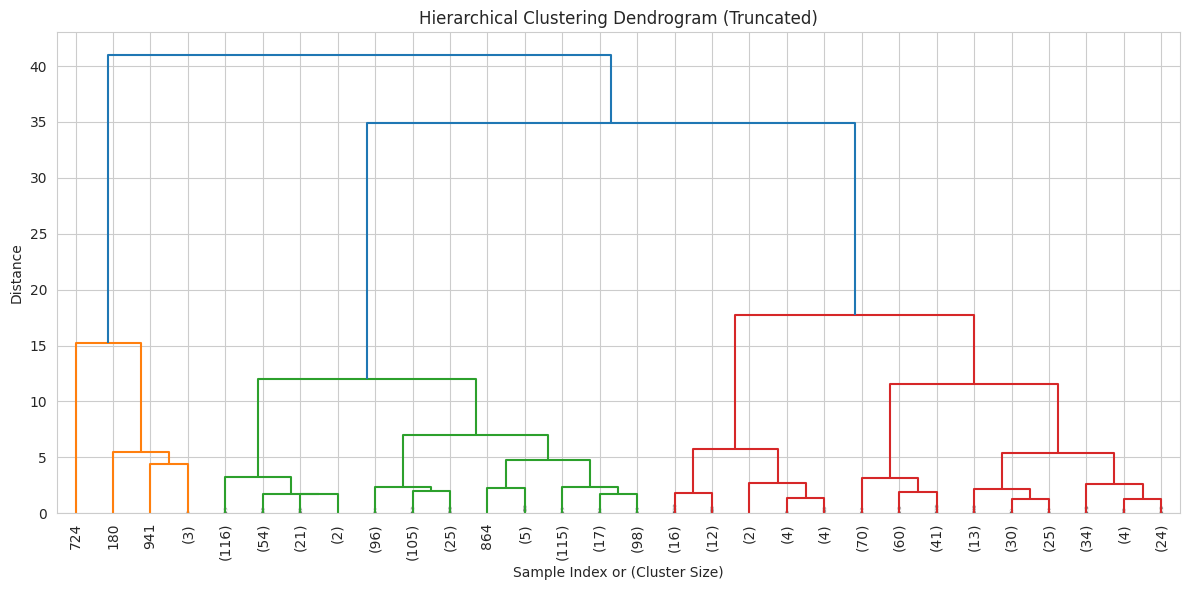

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

sample_df = df[['ctc', 'years_experience']].dropna().sample(n=1000, random_state=42)
scaler = StandardScaler()
sample_scaled = scaler.fit_transform(sample_df)

linked = linkage(sample_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

sample_df['h_cluster'] = fcluster(linked, t=3, criterion='maxclust')

**Insights:**
* The dendrogram shows a clear separation into 3 broad clusters (based on the large vertical linkage distances), which aligns with the KMeans elbow result observed previously.

* One cluster (far left) contains a significantly higher number of points  (724), suggesting a group of learners with very similar CTC and experience.

* Clusters with smaller sizes (2-5) represent the outliers, possibly top earners or freshers with unusually high or low CTCs.

* The large vertical distance between cluster merges (~35–40 height) suggests high dissimilarity between clusters, validating meaningful grouping.

**Cluster Profile Summary:**

In [ ]:
cluster_summary = df.groupby('kmeans_cluster').agg({
    'ctc': ['count', 'mean', 'median', 'min', 'max'],
    'years_experience': ['mean', 'median', 'min', 'max'],
    'job_position': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown',
    'company_hash': pd.Series.nunique
})

cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary.reset_index(inplace=True)

cluster_summary.rename(columns={
    'kmeans_cluster': 'Cluster',
    'ctc_count': 'Learner Count',
    'ctc_mean': 'Avg CTC (in millions)',
    'ctc_median': 'Median CTC (in millions)',
    'ctc_min': 'Min CTC (in millions)',
    'ctc_max': 'Max CTC (in millions)',
    'years_experience_mean': 'Avg Experience (in years)',
    'years_experience_median': 'Median Experience (in years)',
    'years_experience_min': 'Min Experience (in years)',
    'years_experience_max': 'Max Experience (in years)',
    'job_position_<lambda>': 'Most Common Job Position',
    'company_hash_nunique': 'Unique Companies'
}, inplace=True)

cluster_summary

,Cluster,Learner Count,Avg CTC (in millions),Median CTC (in millions),Min CTC (in millions),Max CTC (in millions),Avg Experience (in years),Median Experience (in years),Min Experience (in years),Max Experience (in years),Most Common Job Position,Unique Companies
0,0,60997,2.289206e+06,1090000.0,25,250000000,10.274013,9.0,-18140,2025,Backend Engineer,11539
1,1,83376,2.220744e+06,880000.0,2,1000150000,9.960816,9.0,-18140,2025,Backend Engineer,12988
2,2,61436,2.324016e+06,900000.0,600,255555555,10.175369,9.0,-82,2025,Backend Engineer,12772


**Insights:**

* Cluster 2 has the highest average CTC (~₹2.32M) and median CTC (₹900K), suggesting it contains higher-paying roles and possibly more mature companies.

* Cluster 1 has the largest learner base (83,376) and the highest number of unique companies (12,988), indicating broader company representation and possibly more varied roles.

### **Actionable Insights & Recommendations:**

* **Broaden Learner Profiles**
  * Median years of experience remains around 9 years across clusters, suggesting largely mid-level professionals enroll at Scaler.
  * Custom learning paths are to be developed for freshers and senior engineers, to expand user base.

* **Missing and Generic Job Titles:**

   * A significant portion of learners had "Unknown" or "Other" as job titles before imputation, indicating poor data entry.
   *  Needs better job title standardization during onboarding and user profiling.

* **Backend Engineer Dominance:**

   * Across all clusters, Backend Engineer is the most common role, indicating high learner interest and demand in this area.

   * Scaler should also enrich content other areas of learner interest, to attract more learners, while also maintaining quality learning in Web Development.

* **Targeted Job Assistance:**

  * Use clustering to match learners with jobs from similar CTC/experience tiers.

  * Introduce a job recommendation engine based on cluster traits

* **Upskill Low-Earning Learners:**

  * Although cluster-1 has the largest count but it also has the lowest avg CTC.
  * Additional assistance and interview prep may be required for such learners, inorder to enhance their career prospectives.

* **Strengthen Alumni Relations & Branding:**

  * Highlight high-CTC earners and top job switchers as those from Cluster 2 as success stories in marketing and outreach.

In conclusion, leveraging data-driven clustering and actionable insights enables Scaler to strategically enhance its offerings, personalize learner journeys and position itself as a premier tech-education platform that not only educates but also accelerates meaningful career outcomes.